# 直方图均衡化：

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np 


(256, 256)
119


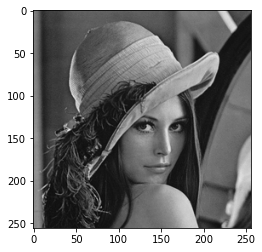

In [2]:
img = plt.imread("..//pic/LENA.bmp", format = "gray")[:,:,0]
print(img.shape)
print(img[50,50])
plt.imshow(img, cmap="gray")

In [3]:
def Histogram(img, k):
    histo = np.zeros([k])
    for i in range(img.shape[0]):
       for j in range(img.shape[1]):
           histo[img[i,j]] += 1
    histo /= img.shape[0] * img.shape[1]
    
    return histo

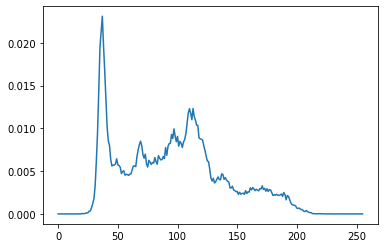

In [4]:
histo = Histogram(img, 256)
plt.plot(histo)

In [5]:
def CDF(histo):
    cdf = np.zeros(histo.shape[0])
    for i in range(histo.shape[0]):
        for j in range(i):
            cdf[i] += histo[j]
    
    return cdf

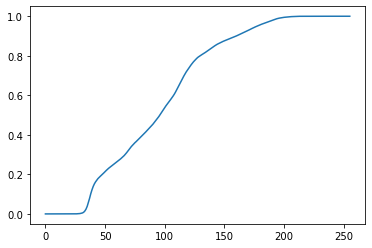

In [6]:
cdf = CDF(histo)
plt.plot(cdf)

In [7]:
def EqMap(cdf, k):
    eqmap = np.zeros(k)
    for i in range(k):
        eqmap[i] = int(np.around(cdf[i] * (k-1)))
    
    return eqmap

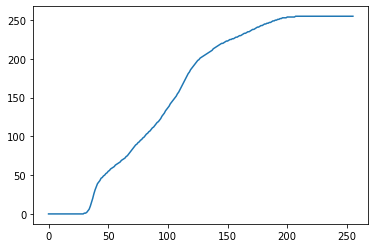

In [8]:
eqmap = EqMap(cdf, 256)
plt.plot(eqmap)

In [9]:
def Eqlization(img,eqmap):
    eqimg = np.zeros(img.shape)
    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
         eqimg[i,j] = eqmap[img[i,j]]
    
    return eqimg

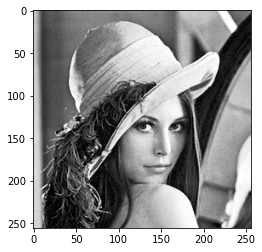

In [10]:
eqimg = Eqlization(img, eqmap)
plt.imshow(eqimg, cmap = "gray")

In [11]:
eqhisto = Histogram(eqimg.astype(int), 256)

In [12]:
eqcdf = CDF(eqhisto)

# 直方图规定化

(256, 256)


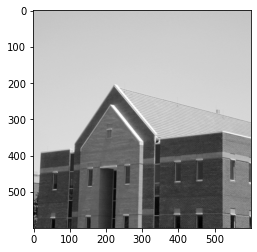

In [13]:
img2 = plt.imread("../pic/BUILDING.bmp")
plt.imshow(img2)
print(img.shape)

In [14]:
histo2 = Histogram(img2, 256)

In [15]:
cdf2 = CDF(histo2)

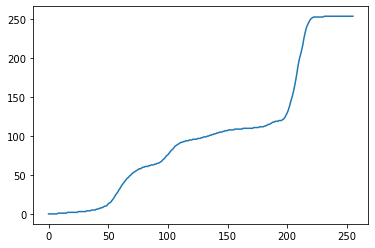

In [16]:
gz = np.zeros(256)
for i in range(256):
    gz[i] = (np.around(cdf2[i] * 255))
plt.plot(gz)

In [17]:
def Remap(gz):
    gz = list(gz)
    remap = []
    temp_pre = 0 
    for n in range(256):
        try:
            temp = gz.index(n)
            temp_pre = temp
        except BaseException:
            temp = temp_pre 
        remap.append(temp)
    remap = np.array(remap)
    return remap

In [18]:
remap = Remap(gz)

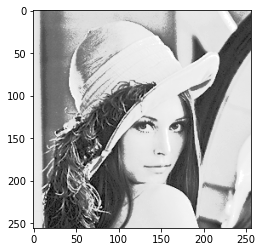

In [19]:
specimg = np.zeros(img.shape)
for i in range(eqimg.shape[0]):
    for j in range(eqimg.shape[1]):
        specimg[i,j] = remap[int(eqimg[i,j])]                   
plt.imshow(specimg, cmap = "gray")

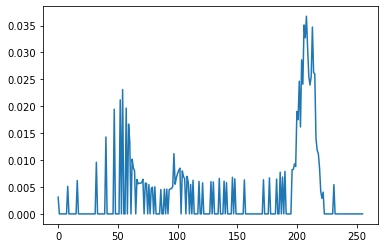

In [25]:
spechisto = Histogram(specimg.astype(int), 256)
plt.plot(spechisto)

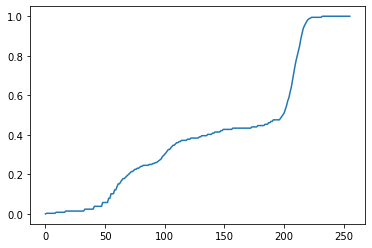

In [26]:
speccdf = CDF(spechisto)
plt.plot(speccdf)

# 局部直方图均衡化

70


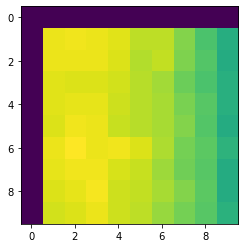

In [22]:
convimg = np.zeros(img.shape)
kernelsize = 3
padsize = int((kernelsize - 1) / 2)
padimg = np.zeros([img.shape[0]+padsize*2, img.shape[1]+padsize*2])
padimg[padsize:padimg.shape[0]-1,padsize:padimg.shape[1]-1] = img
padimg = padimg.astype(int)
plt.imshow(padimg[0:10,0:10])
print(padimg[10,10])

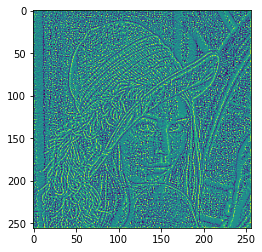

In [24]:
for i in range(256):
    for j in range(256):
        convhisto = Histogram(padimg[i:i+3,j:j+3], 256)
        convcdf = CDF(convhisto)
        conveqmap = EqMap(convcdf, 256)
        conveqimg = Eqlization(padimg[i:i+3,j:j+3], conveqmap)
        convimg[i, j] = conveqimg[1, 1]
plt.imshow(convimg)

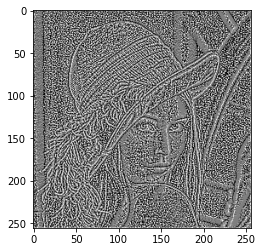

In [28]:
plt.imshow(convimg, cmap = "gray")